In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data and check some value

In [30]:
data = pd.read_csv("ipl (1).csv", engine="pyarrow", dtype_backend='pyarrow') # Using pyarray to load data more fast
data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [31]:
# Count NaN
data.isna().sum().sum()

0

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype               
---  ------          --------------  -----               
 0   mid             76014 non-null  int64[pyarrow]      
 1   date            76014 non-null  date32[day][pyarrow]
 2   venue           76014 non-null  string[pyarrow]     
 3   bat_team        76014 non-null  string[pyarrow]     
 4   bowl_team       76014 non-null  string[pyarrow]     
 5   batsman         76014 non-null  string[pyarrow]     
 6   bowler          76014 non-null  string[pyarrow]     
 7   runs            76014 non-null  int64[pyarrow]      
 8   wickets         76014 non-null  int64[pyarrow]      
 9   overs           76014 non-null  double[pyarrow]     
 10  runs_last_5     76014 non-null  int64[pyarrow]      
 11  wickets_last_5  76014 non-null  int64[pyarrow]      
 12  striker         76014 non-null  int64[pyarrow]      
 13  non-striker     

In [33]:
data.describe()

,mid,date,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,2012-10-19,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
min,1.000000,2008-04-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,2010-04-11,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,2012-05-20,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,2015-04-19,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,2017-05-21,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000
std,178.156878,NaN,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231


In [34]:
col_number = []
col_string = []
for col in data.columns:
    if data[col].dtype != "date32[day][pyarrow]" and data[col].dtype != "string[pyarrow]":
        col_number.append(col)
    if data[col].dtype == "string[pyarrow]":
        col_string.append(col)

print(len(col_number))
print(len(col_string))

9
5


# Draw chart hist to check distribution

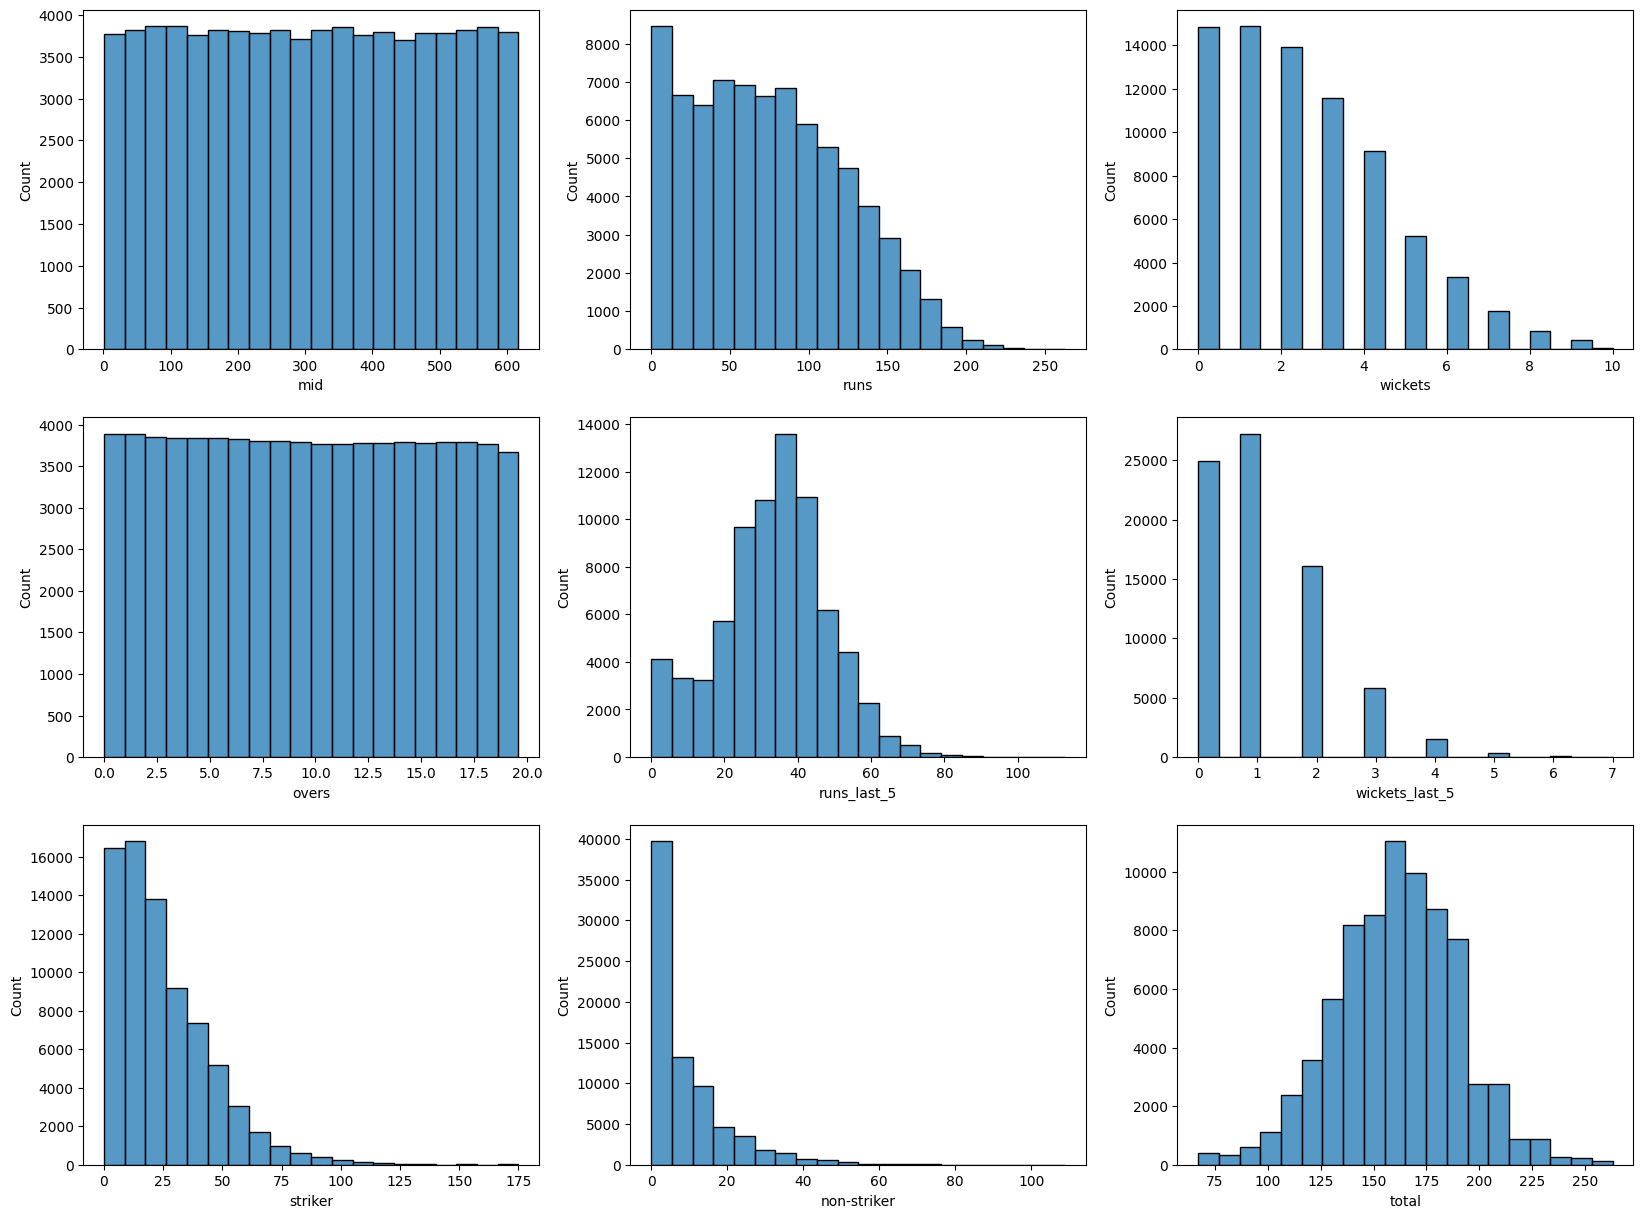

In [35]:
total_image = len(col_number)

plt.figure(figsize=(20, 15))

for i in range(total_image):
    plt.subplot(total_image//3, 3, i+1)
    sns.histplot(data[col_number[i]], bins=20)

# Check outliers data

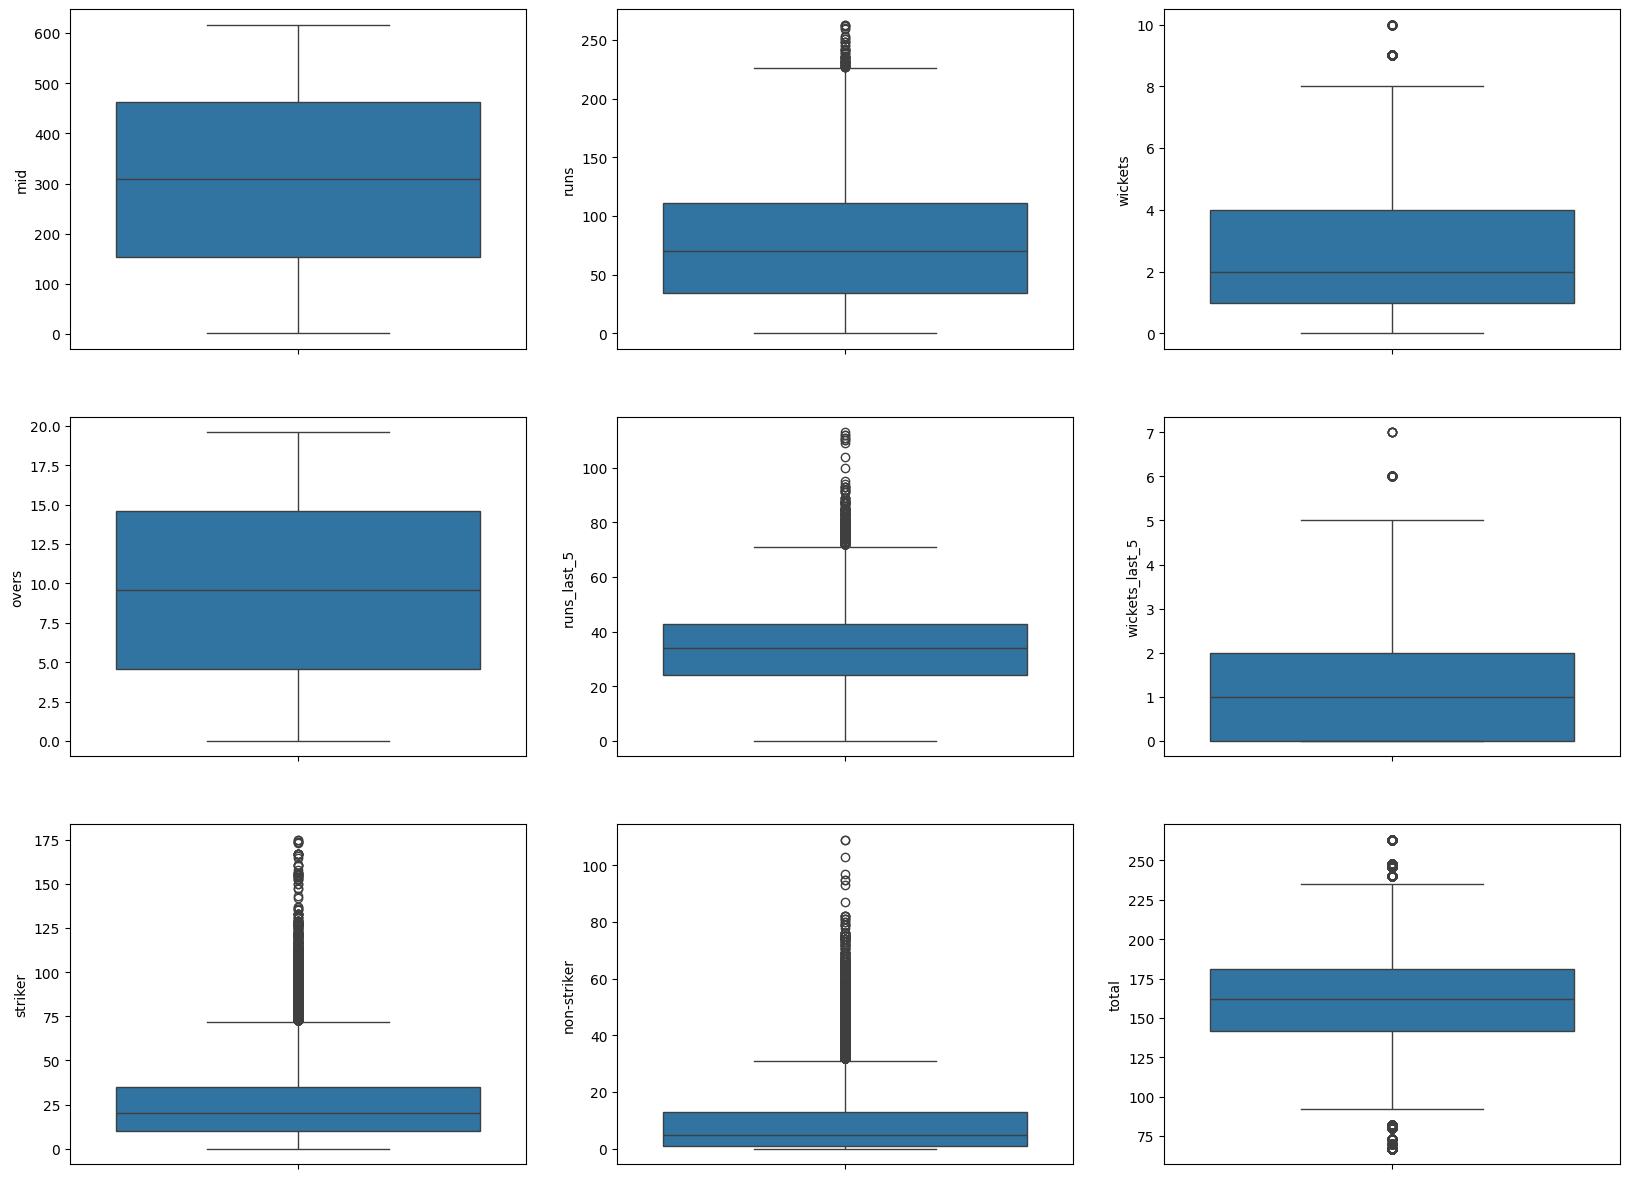

In [36]:
total_image = len(col_number)

plt.figure(figsize=(20, 15))

for i in range(total_image):
    plt.subplot(total_image//3, 3, i+1)
    sns.boxplot(data[col_number[i]])

In [37]:
data.corr(numeric_only=True).style.background_gradient(cmap="RdBu", vmin=-1, vmax=1)

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.026470,-0.055220,0.002487,0.045320,-0.031886,0.033432,0.049975,0.096586
runs,0.026470,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,-0.055220,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.002487,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282
runs_last_5,0.045320,0.750565,0.242942,0.629374,1.000000,0.058672,0.675924,0.501475,0.368253
wickets_last_5,-0.031886,0.297768,0.693740,0.382850,0.058672,1.000000,-0.214576,-0.421250,-0.273475
striker,0.033432,0.594818,0.019712,0.477508,0.675924,-0.214576,1.000000,0.554439,0.381664
non-striker,0.049975,0.315422,-0.171962,0.236430,0.501475,-0.421250,0.554439,1.000000,0.293233
total,0.096586,0.254498,-0.337343,0.022282,0.368253,-0.273475,0.381664,0.293233,1.000000


In [38]:
from scipy import stats

def Remove_Outliers(df, columns):
    result = df.copy()
    df_score = stats.zscore(result[columns])
    gamma = (1 - 1/(2*len(result)))
    limit = stats.norm.cdf(stats.norm.pdf(gamma + (1-gamma)/2))
    outlier_rows = np.any(np.abs(df_score) > limit, axis=1)
    result = result.loc[~outlier_rows].reset_index(drop=True)
    return result

In [39]:
# Drop outlier target (total)
data_new = Remove_Outliers(data, ["total"])

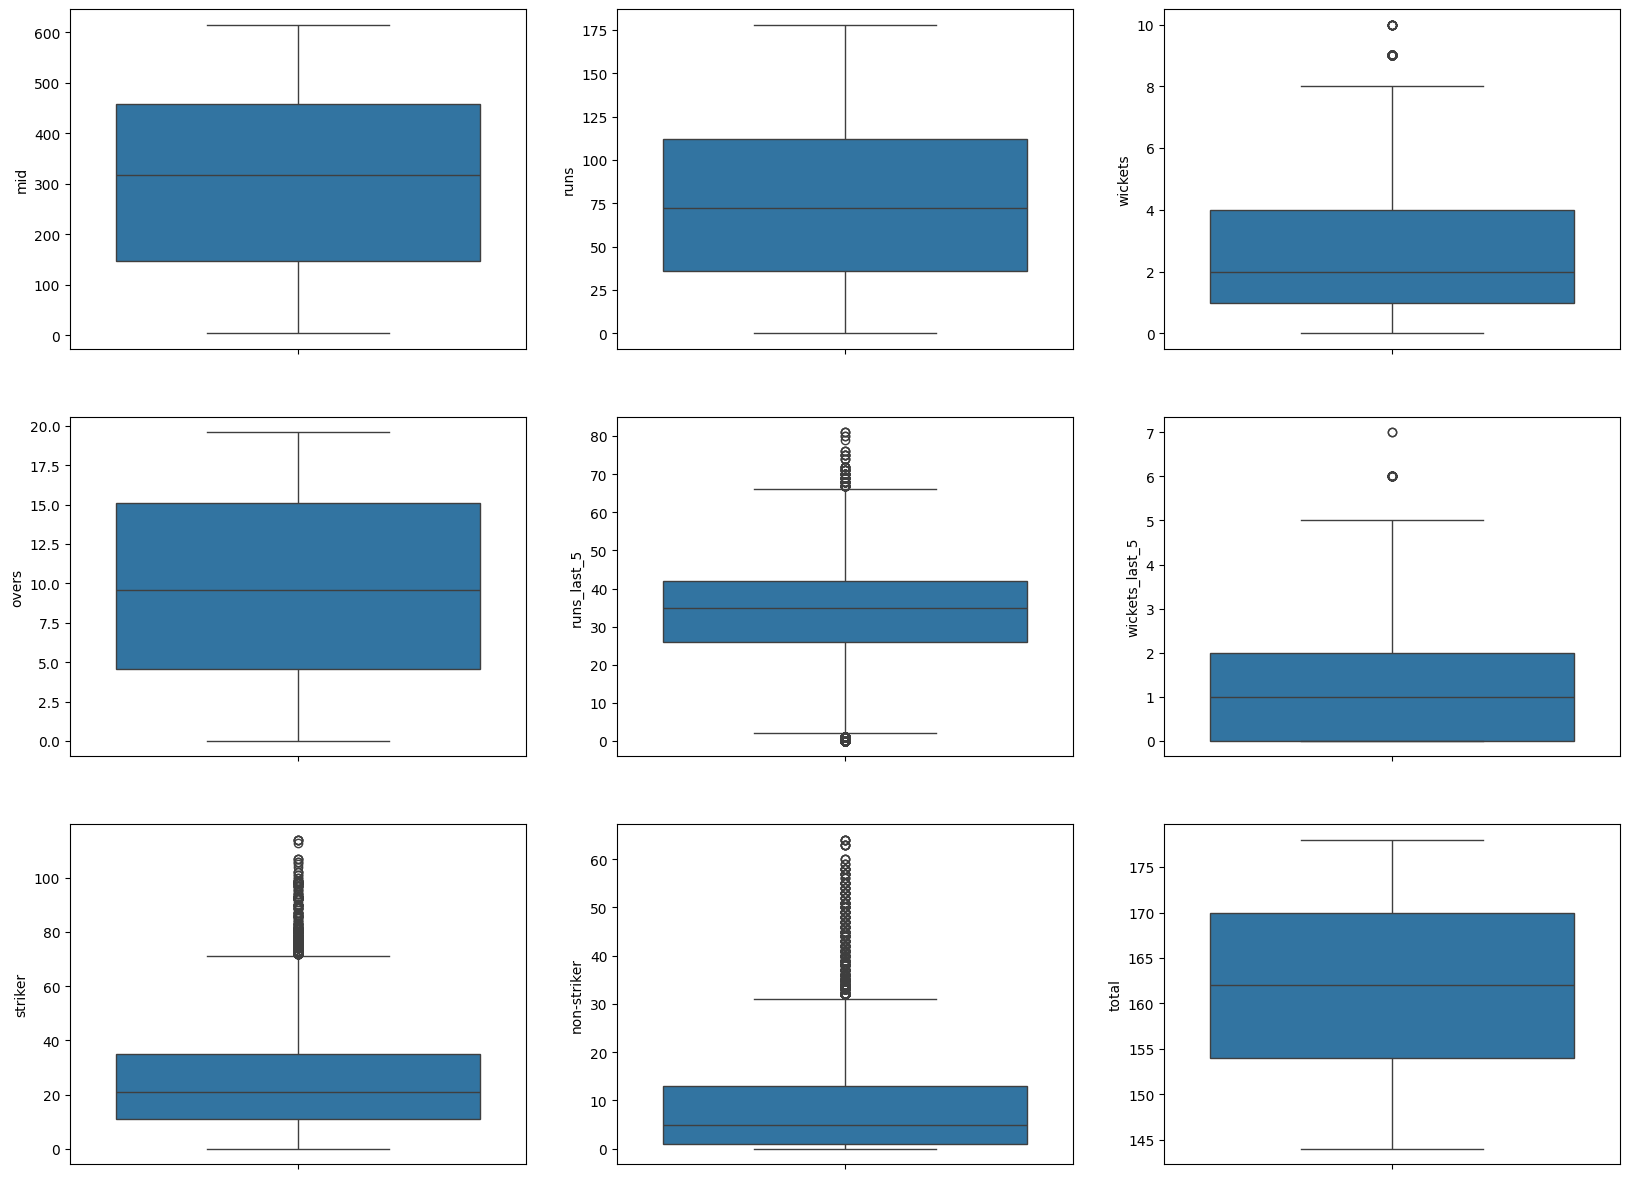

In [40]:
total_image = len(col_number)

plt.figure(figsize=(20, 15))

for i in range(total_image):
    plt.subplot(total_image//3, 3, i+1)
    sns.boxplot(data_new[col_number[i]])

In [41]:
data_new.corr(numeric_only=True).style.background_gradient(cmap="RdBu", vmin=-1, vmax=1)

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.015643,-0.024657,0.001930,0.025157,-0.002575,0.032800,0.028295,0.050028
runs,0.015643,1.000000,0.761082,0.974778,0.726053,0.403065,0.517267,0.235449,0.095514
wickets,-0.024657,0.761082,1.000000,0.805115,0.412934,0.687272,0.147815,-0.114308,-0.150165
overs,0.001930,0.974778,0.805115,1.000000,0.671135,0.414627,0.495245,0.223335,-0.000659
runs_last_5,0.025157,0.726053,0.412934,0.671135,1.000000,0.155828,0.619718,0.441043,0.140481
wickets_last_5,-0.002575,0.403065,0.687272,0.414627,0.155828,1.000000,-0.183830,-0.417571,-0.091409
striker,0.032800,0.517267,0.147815,0.495245,0.619718,-0.183830,1.000000,0.510800,0.085239
non-striker,0.028295,0.235449,-0.114308,0.223335,0.441043,-0.417571,0.510800,1.000000,0.073748
total,0.050028,0.095514,-0.150165,-0.000659,0.140481,-0.091409,0.085239,0.073748,1.000000


In [42]:
import statsmodels.api as sm

new_col = np.delete(np.array(col_number), np.where(np.array(col_number) == "total"))

y = np.array(data_new["total"])
x1 = np.array(data_new[new_col],dtype=np.float64)
print(new_col)

['mid' 'runs' 'wickets' 'overs' 'runs_last_5' 'wickets_last_5' 'striker'
 'non-striker']


In [43]:
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1252.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:51:24   Log-Likelihood:            -1.2336e+05
No. Observations:               34721   AIC:                         2.467e+05
Df Residuals:                   34712   BIC:                         2.468e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.4370      0.156   1043.450      0.000     162.132     162.742
x1             0.0010      0.000      3.923      0.000       0.000       0.001
x2             0.3745      0.005     75.875      0.000       0.365       0.384
x3            -1.9953      0.057    -34.794      0.000      -2.108      -1.883
x4            -2.3276      0.042    -55.662      0.000      -2.410      -2.246
x5            -0.0077      0.006     -1.345      0.179      -0.019       0.004
x6            -0.0557      0.072     -0.771      0.441      -0.197       0.086
x7            -0.0421      0.004    -10.715      0.000      -0.050      -0.034
x8            -0.0459      0.007     -7.051      0.000      -0.059      -0.033
==============================================================================
Omnibus:                     1299.882   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.984
Skew:                          -0.092   Prob(JB):                    9.51e-133
Kurtosis:                       2.379   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We have linear model with all P-value of varibale `x5:runs_last_5` and `x6:wickets_last_5` > 0.05. I will remove this

In [44]:
x_final_1 = np.delete(x, [5, 6], axis=1)
x_final = sm.add_constant(x_final_1)
result_final = sm.OLS(y, x_final).fit()
result_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1669.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:51:24   Log-Likelihood:            -1.2336e+05
No. Observations:               34721   AIC:                         2.467e+05
Df Residuals:                   34714   BIC:                         2.468e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.2812      0.124   1307.840      0.000     162.038     162.524
x1             0.0010      0.000      3.910      0.000       0.000       0.001
x2             0.3711      0.004     83.221      0.000       0.362       0.380
x3            -2.0200      0.050    -40.164      0.000      -2.119      -1.921
x4            -2.3089      0.040    -57.306      0.000      -2.388      -2.230
x5            -0.0430      0.004    -11.702      0.000      -0.050      -0.036
x6            -0.0466      0.006     -7.903      0.000      -0.058      -0.035
==============================================================================
Omnibus:                     1293.377   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.839
Skew:                          -0.092   Prob(JB):                    2.78e-132
Kurtosis:                       2.380   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Get new value by fitting linear

In [45]:
data_new["total_fitting"] = result_final.fittedvalues

data_new

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,total_fitting
0,4,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,P Kumar,0,0,0.1,0,0,0,0,165,162.054253
1,4,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,P Kumar,4,0,0.2,4,0,4,0,165,163.135606
2,4,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,P Kumar,4,0,0.3,4,0,4,0,165,162.904711
3,4,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,P Kumar,4,0,0.4,4,0,4,0,165,162.673817
4,4,2008-04-20,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,P Kumar,8,0,0.5,8,0,8,0,165,163.755170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34716,615,2017-05-16,Wankhede Stadium,Rising Pune Supergiant,Mumbai Indians,MS Dhoni,JJ Bumrah,154,3,19.2,50,0,58,32,162,165.659774
34717,615,2017-05-16,Wankhede Stadium,Rising Pune Supergiant,Mumbai Indians,MS Dhoni,JJ Bumrah,156,3,19.3,51,0,58,34,162,166.077897
34718,615,2017-05-16,Wankhede Stadium,Rising Pune Supergiant,Mumbai Indians,MS Dhoni,JJ Bumrah,162,3,19.4,57,0,58,40,162,167.794058
34719,615,2017-05-16,Wankhede Stadium,Rising Pune Supergiant,Mumbai Indians,MS Dhoni,JJ Bumrah,162,3,19.5,56,0,58,40,162,167.563163


Text(0.5, 0, 'total_fitting')

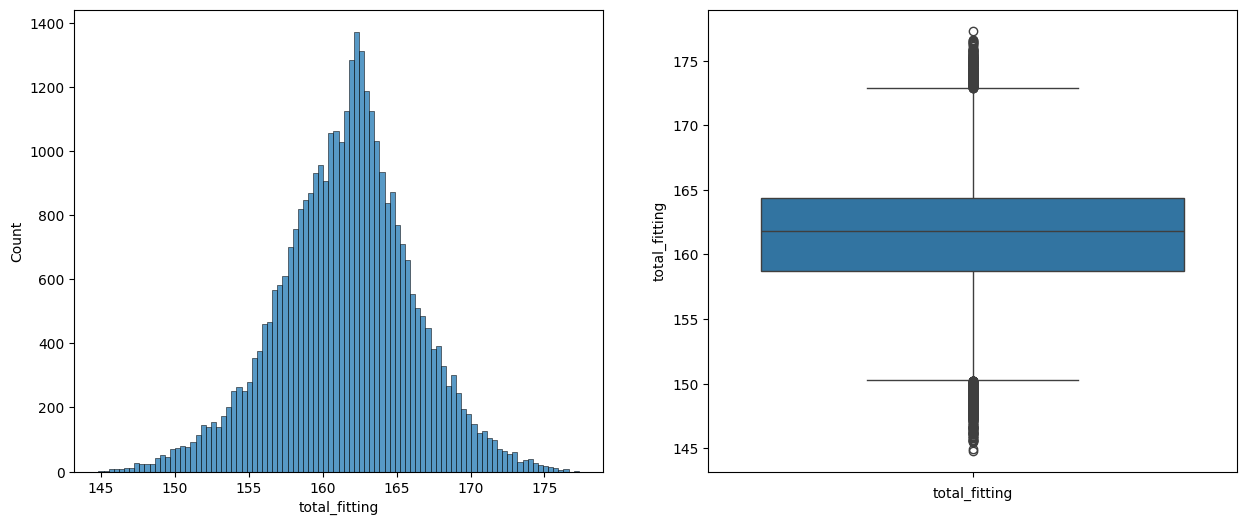

In [46]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.histplot(data_new["total_fitting"])
plt.xlabel("total_fitting")
plt.subplot(122)
sns.boxplot(data_new["total_fitting"])
plt.xlabel("total_fitting")

In [47]:
data_new["total_fitting"].describe()

count    34721.000000
mean       161.555312
std          4.537426
min        144.817937
25%        158.732347
50%        161.786320
75%        164.391262
max        177.323946
Name: total_fitting, dtype: float64

In [72]:
def Values_Count(df, col):
    value = np.unique(df[col])
    total_score = []
    for val in value:
        temp = np.sum(df["total_fitting"].where(df[col] == val))
        total_score.append(temp)
    result = pd.DataFrame({
        col: value,
        "total_score": total_score
    })
    result = result.sort_values(by="total_score", ascending=False).reset_index(drop=True)
    return result

In [73]:
bat_team = Values_Count(data_new, "bat_team")
bowl_team = Values_Count(data_new, "bowl_team")
batsman = Values_Count(data_new, "batsman")
bowler = Values_Count(data_new, "bowler")

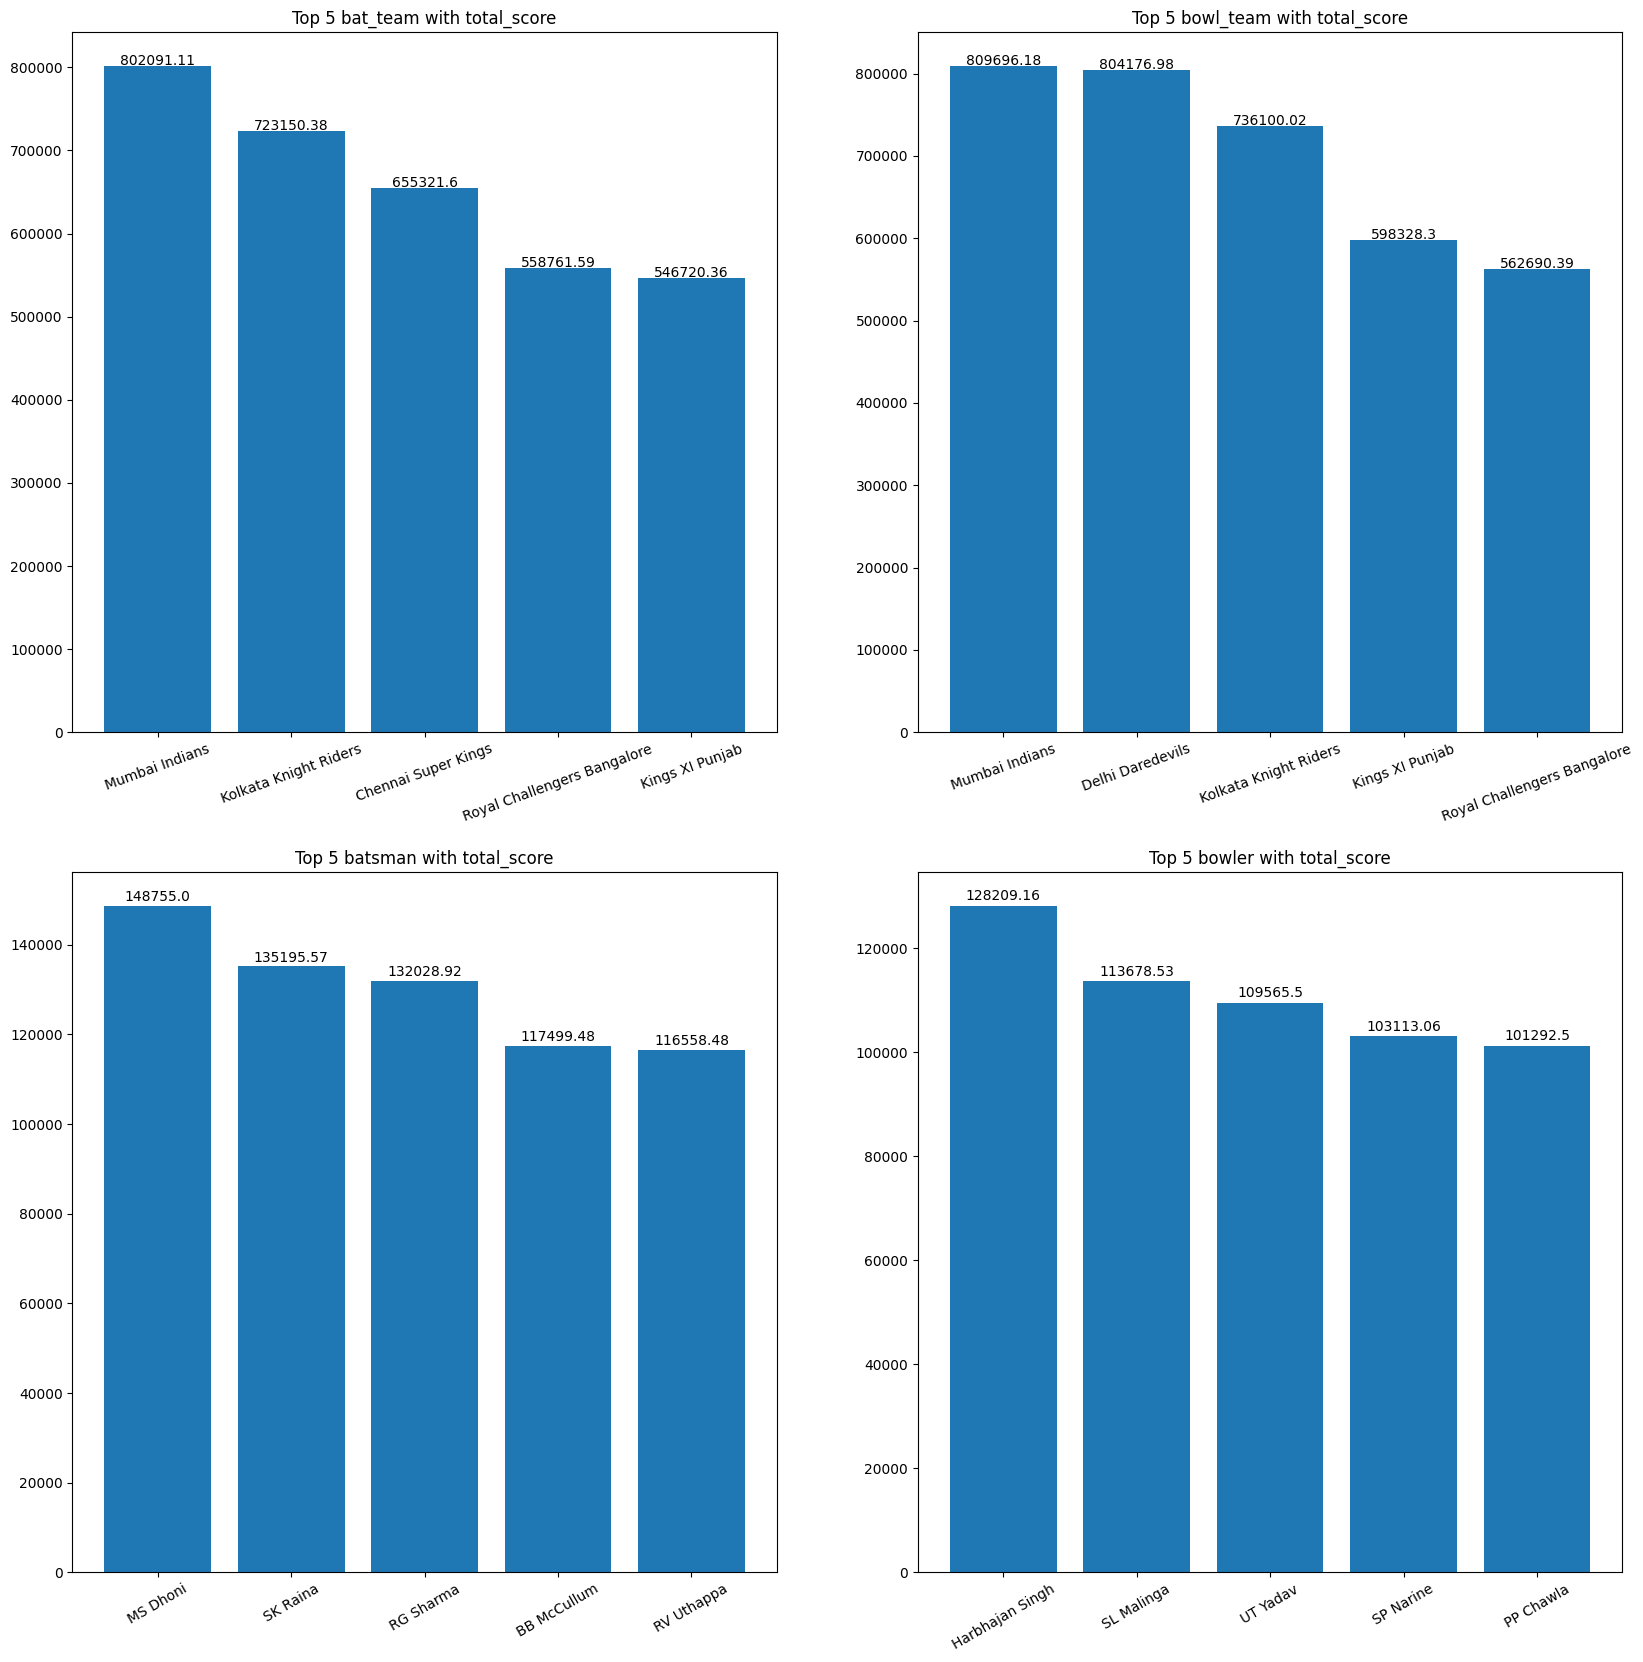

In [109]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1000, np.round(y[i], 2), ha = 'center')

plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.title("Top 5 bat_team with total_score")
plt.bar(bat_team["bat_team"][:5], bat_team["total_score"][:5])
addlabels(bat_team["bat_team"][:5], bat_team["total_score"][:5])
plt.xticks(rotation=20)

plt.subplot(222)
plt.title("Top 5 bowl_team with total_score")
plt.bar(bowl_team["bowl_team"][:5], bowl_team["total_score"][:5])
addlabels(bowl_team["bowl_team"][:5], bowl_team["total_score"][:5])
plt.xticks(rotation=20)

plt.subplot(223)
plt.title("Top 5 batsman with total_score")
plt.bar(batsman["batsman"][:5], batsman["total_score"][:5])
addlabels(batsman["batsman"][:5], batsman["total_score"][:5])
plt.xticks(rotation=30)

plt.subplot(224)
plt.title("Top 5 bowler with total_score")
plt.bar(bowler["bowler"][:5], bowler["total_score"][:5])
addlabels(bowler["bowler"][:5], bowler["total_score"][:5])
plt.xticks(rotation=30)

plt.show()